# <font color='red'>Default Payment of Credit Cards prediction</font>

This Prediction Notebook is presented by:

- Eya Kaabachi
- Jihed Bennaas
- Chaima Khemiri
- Maroua Hamdi
- Wael Benyahmed

Class of 4DS3

## <font color='blue'> I- Business Understanding:</font>

Credit-card debts are among the most significant assets of many banks, and in the modern era, credit-card ownership is exceptionally widespread. People often prefer to obtain “advanced consumption” as well as loans from their financial institutions.

A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers.

That's why we gathered a wide dataset to predict the likelihood of defaulting!

## <font color='blue'> II- Data Understanding:</font>
### Content And Variables:

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**.


There are 25 variables:

the **client's personal information** :

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=others, 6=others)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=divorced, 4=others)
* **AGE**: Age in years

the **history of past payments** :

* **PAY_0**: Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)

the **amount of bill statement** : 

* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)

the **amount of previous payment** :

* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)

the **Label** :

* **default payment next month**: Default payment (1=yes, 0=no)


## <font color='blue'> III. Data Preparation:</font>
### Load Packages:

In [1]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB

import keras
from keras.initializers import glorot_uniform
from keras.models import Sequential
from keras.layers import Dense
from lightgbm import LGBMClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix #test the performance of our matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

### Read the data:

In [2]:
# importing the data
xls=pd.ExcelFile('default of credit card clients.xls') 
print(xls.sheet_names)
#our dataset is named df
df = pd.read_excel(xls,'Data',header=1)
df

['Data']


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Checking the data:

Here we're gonna see how many rows and columns we have, if there's a missing value and see the head and the tail of our dataset.

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
df.shape #dimension

(30000, 25)

In [6]:
print("Default Credit Card Clients data -  rows:",df.shape[0]," columns:", df.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either married or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We notice that we don't have any NULL value but let's check that again!

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

We've noticed that the label "target" is difficult to memorize so let's change its name !

In [12]:
df.drop(0, axis = 0, inplace =True)

In [13]:
df.rename(columns = {'default payment next month':'Default'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now we have to get rid of the ID column :

**The ID column is not important in our dataset!**

In [14]:
df.drop('ID', axis = 1, inplace =True)


In [15]:
df["Default"].nunique()
df["Default"].unique()

array([1, 0], dtype=int64)

We only have two results in our Default variable!

### Feature Engineering:

The data has been already encoded and cleaned. However, some categorical data have repeated categories. For instance, the variable ‘education’ has three categories with similar information:
4: others, 5: others, and 6: others

In [16]:
# Separating features and target
y = df.Default     # target default=1 or non-default=0
features = df.drop('Default', axis = 1, inplace = False)

In [17]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [18]:
#The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

In [19]:
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

Similarly, the column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category '3'.

In [20]:
df['MARRIAGE'].unique()

array([2, 1, 3, 0], dtype=int64)

In [21]:
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])
df['MARRIAGE'].unique()

array([2, 1, 3], dtype=int64)

## Data Visualization: 
### Data unbalance:

Let's check data unbalance with compared to target value 'Default'

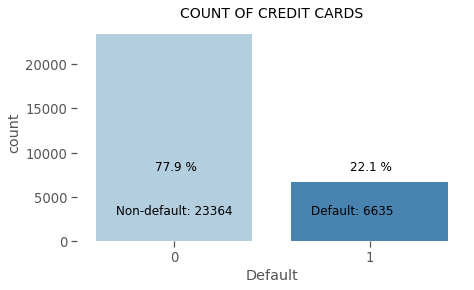

In [22]:
# The frequency of defaults
yes = df.Default.sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

From 30,000 credit card holders, there are 6,636 default credit cards. That's the proportion of default in the data is 22,1%.

### Descriptive Statistics:

The table below shows the descriptive statistics of the variables of this dataset.

In [23]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(df.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

             count       mean        std       min      25%       50%       75%       max
LIMIT_BAL  29999.0  167489.24  129747.03   10000.0  50000.0  140000.0  240000.0  1.00e+06
SEX        29999.0       1.60       0.49       1.0      1.0       2.0       2.0  2.00e+00
EDUCATION  29999.0       1.84       0.74       1.0      1.0       2.0       2.0  4.00e+00
MARRIAGE   29999.0       1.56       0.52       1.0      1.0       2.0       2.0  3.00e+00
AGE        29999.0      35.49       9.22      21.0     28.0      34.0      41.0  7.90e+01
PAY_0      29999.0      -0.02       1.12      -2.0     -1.0       0.0       0.0  8.00e+00
PAY_2      29999.0      -0.13       1.20      -2.0     -1.0       0.0       0.0  8.00e+00
PAY_3      29999.0      -0.17       1.20      -2.0     -1.0       0.0       0.0  8.00e+00
PAY_4      29999.0      -0.22       1.17      -2.0     -1.0       0.0       0.0  8.00e+00
PAY_5      29999.0      -0.27       1.13      -2.0     -1.0  

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

### Frequency of explanatory variables by defaulted and non-defaulted cards:

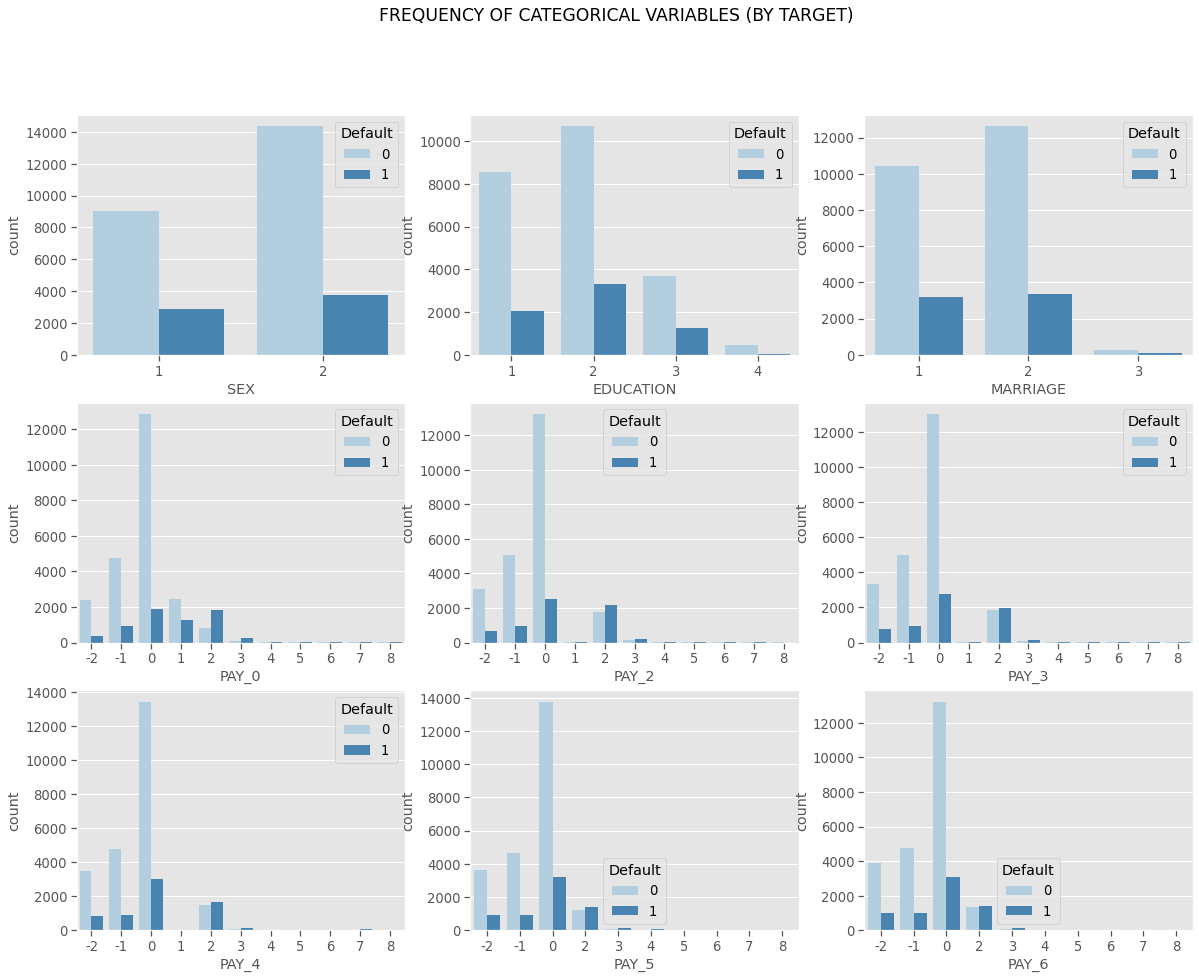

In [24]:
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

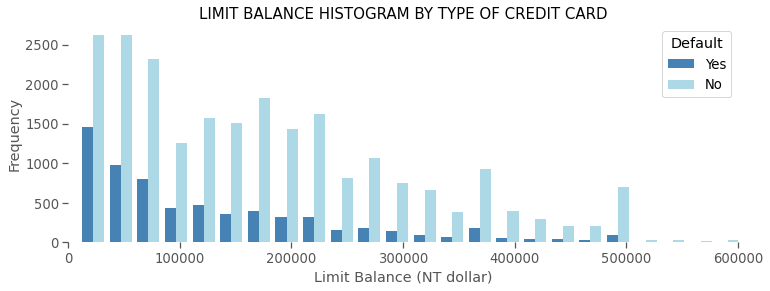

In [25]:
x1 = list(df[df['Default'] == 1]['LIMIT_BAL'])
x2 = list(df[df['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

We notice that:
- Education level is mostly graduate school and university.
- Most of the clients are either marrined or single (less frequent the other status).
- Average age is 35.5 years, with a standard deviation of 9.2.
As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (which is the case following our document).

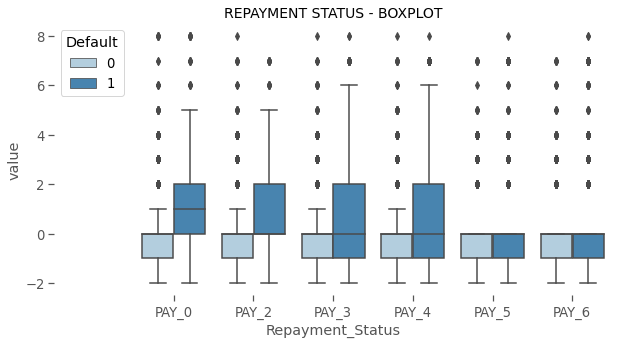

In [26]:
Repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

Here it seems that PAY_0 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power the repayment status in other months.

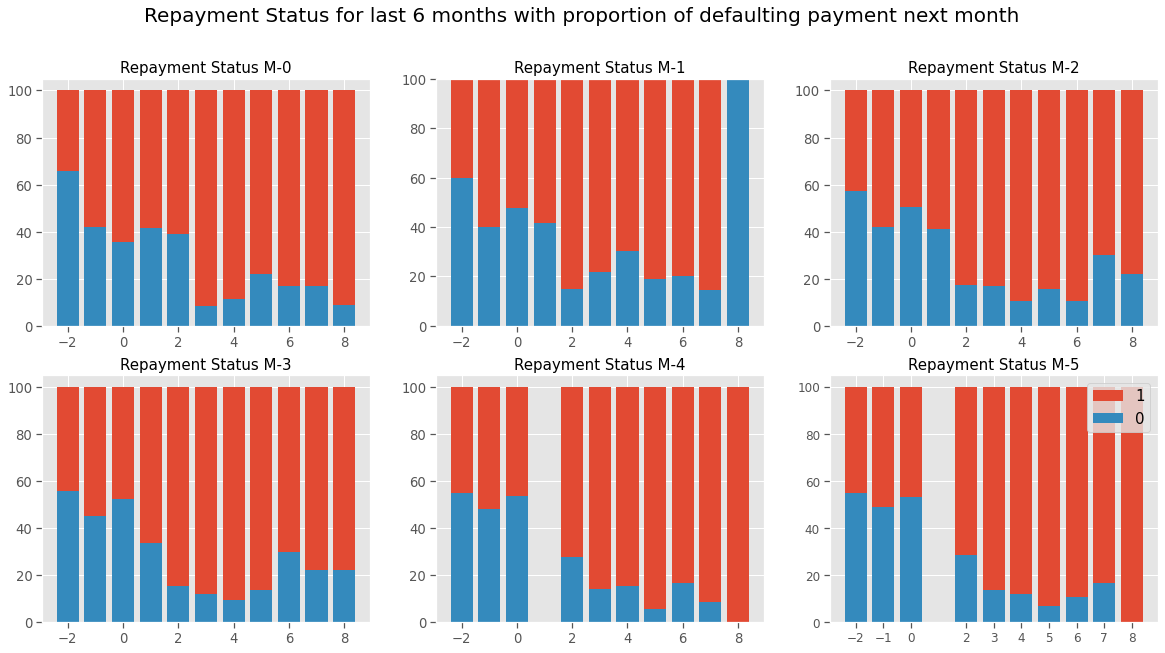

In [27]:
plt.subplots(figsize=(20,10))

ind = sorted(df.PAY_0.unique())
pay_0 = (df.PAY_0[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_0[df['Default'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(df.PAY_2.unique())
pay_0 = (df.PAY_2[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_2[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(df.PAY_3.unique())
pay_0 = (df.PAY_3[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_3[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(df.PAY_4.unique())
pay_0 = (df.PAY_4[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_4[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(df.PAY_5.unique())
pay_0 = (df.PAY_5[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_5[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(df.PAY_6.unique())
pay_0 = (df.PAY_6[df['Default'] == 0].value_counts(normalize=True))
pay_1 = (df.PAY_6[df['Default'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)
plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()

Above plot shows us the proportion of clients that will default payment next month based on repayment history.
For Current month status, the earlier the payment is made lesser are the chances of those clients defaulting the payment.

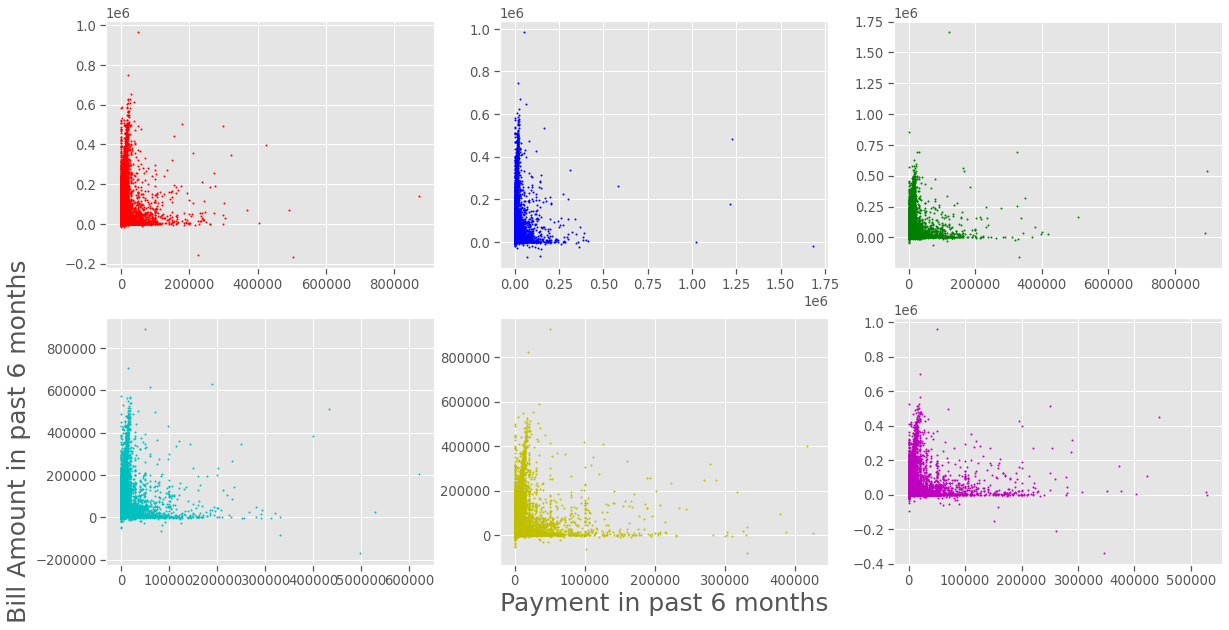

In [28]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

Here, the plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

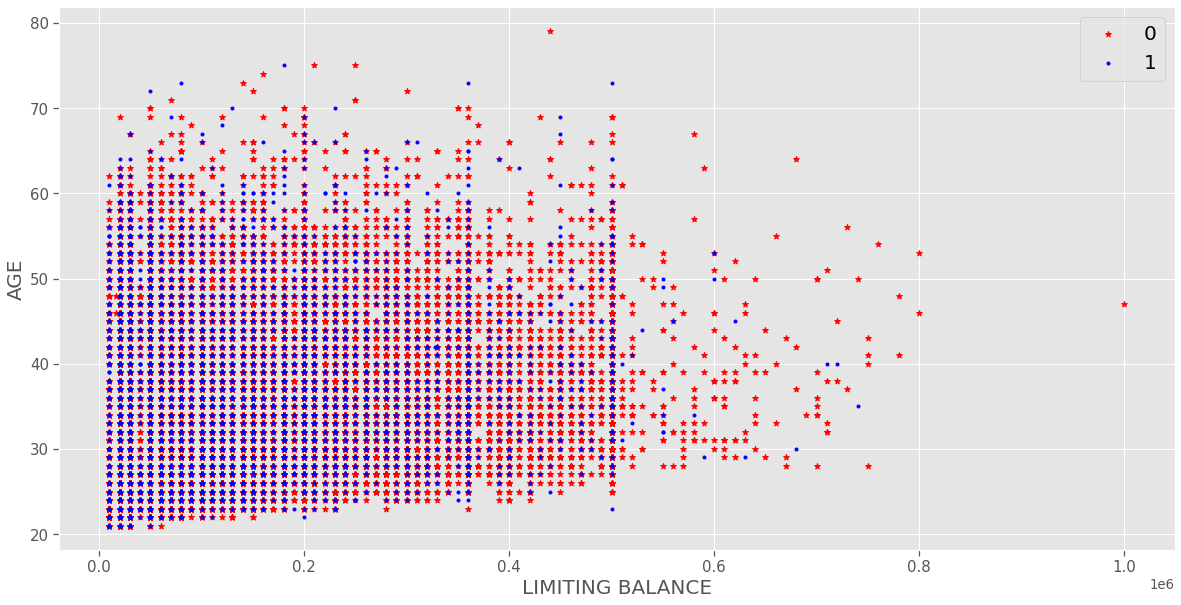

In [29]:
y1 = df.AGE[df["Default"] == 0]
y2 = df.AGE[df["Default"] == 1]
x1 = df.LIMIT_BAL[df["Default"] == 0]
x2 = df.LIMIT_BAL[df["Default"] == 1]

fig,ax = plt.subplots(figsize=(20,10))
plt.scatter(x1,y1, color="r", marker="*", label='0')
plt.scatter(x2,y2, color="b", marker=".", label='1')
plt.xlabel("LIMITING BALANCE", fontsize=20)
plt.ylabel("AGE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=20)
plt.show()

The plot of Age against limiting balance does not provide any accurate information, as there is mixed variation of clients of all age groups and their current month limiting balance.

### Credit limit vs. sex:

Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female.

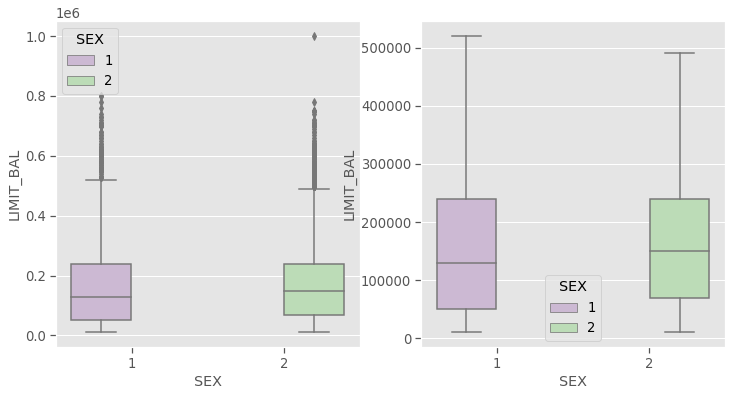

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

### Sex, Education, Age and Marriage: 

Let's show sex, education, age and marriage distributions.

We start by showing the boxplots with age distribution grouped by marriage status and sex.

Marriage status meaning is:

- 0 : unknown (let's consider as others as well)
- 1 : married
- 2 : single
- 3 : others
Sex meaning is:

- 1 : male
- 2 : female

In [31]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

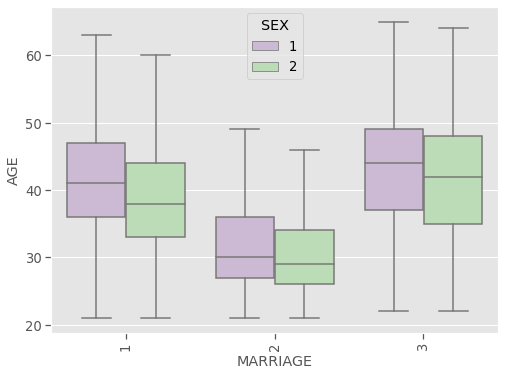

In [32]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

Let's show the boxplots with age distribution grouped by education and marriage.

Education status meaning is:

- 1 : graduate school
- 2 : university
- 3 : high school
- 4 : others
- 5 : unknown
- 6 : unknow

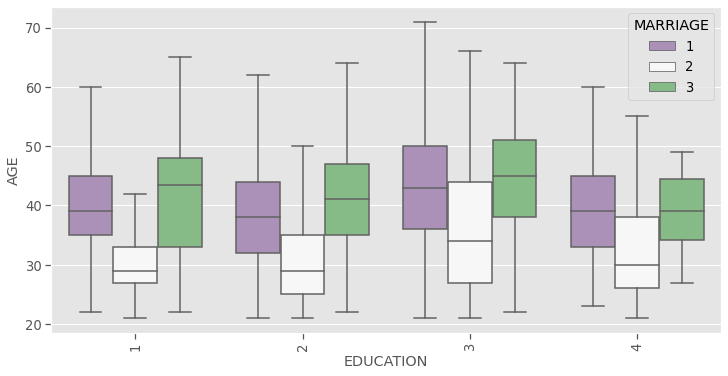

In [33]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

- Age, sex and credit amount limit. Let's show the boxplots with credit amount limit distribution grouped by age and sex.

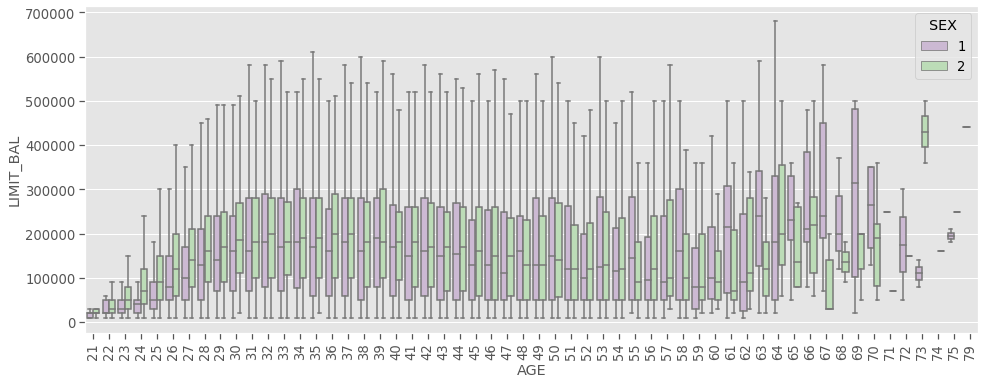

In [34]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Mean, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.

Let's show the boxplots with credit amount limit distribution grouped by marriage status and education level.

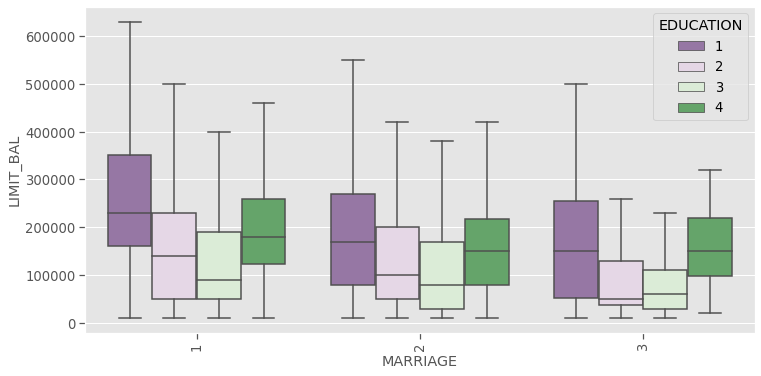

In [35]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### Correlation Martix:

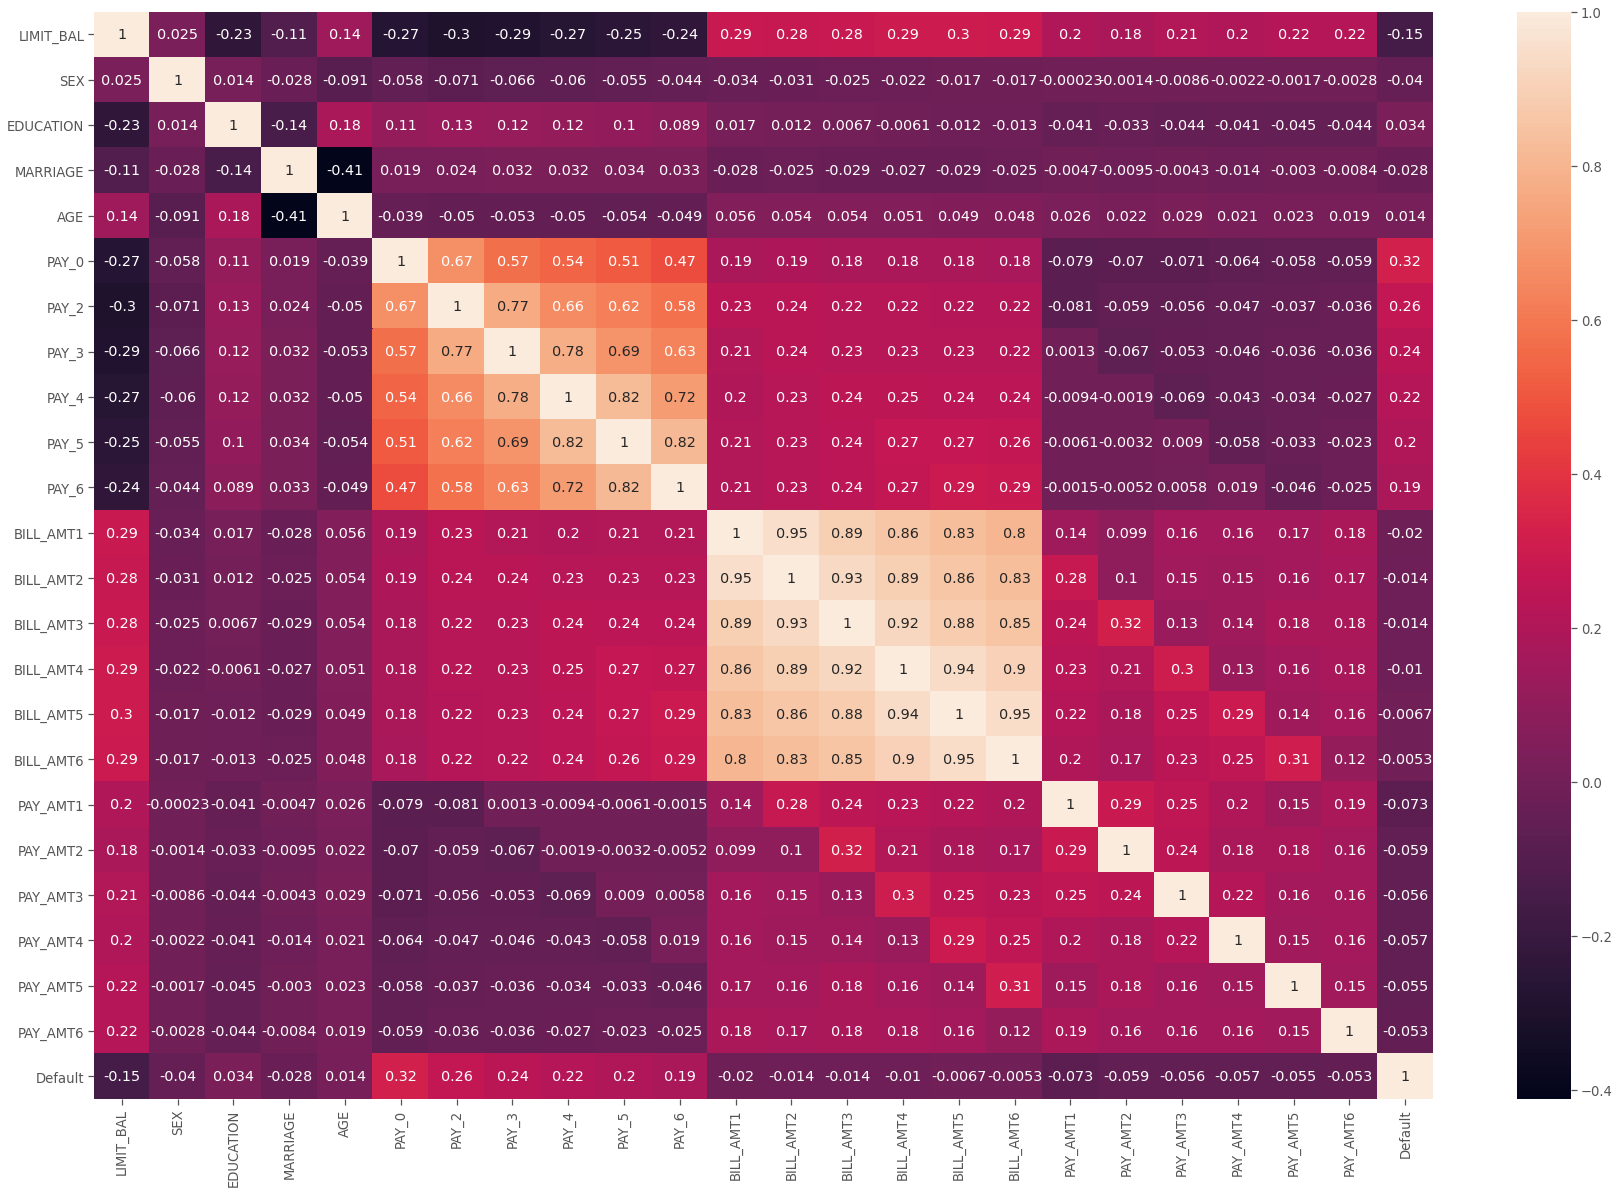

In [36]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

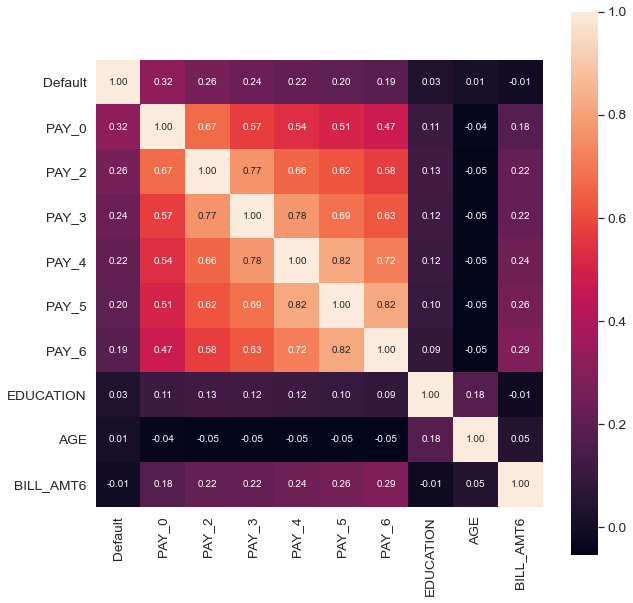

In [37]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Default')['Default'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


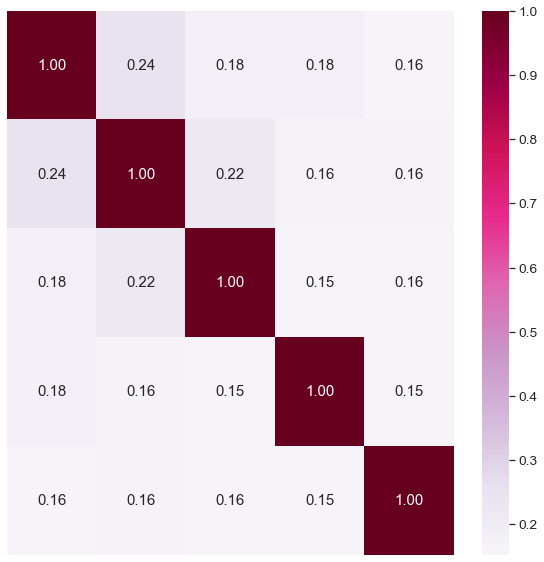

In [38]:
#Crossing Variables 2x2 
#Create Correlation matrix
x= df.iloc[:, 18:]
z=df.iloc[:, 24:]
x=x.iloc[:,:-1]
corr = x.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10) #220 teinte de la couleur + 10 saturation
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,  cmap='PuRd',annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)))
#Apply yticks
plt.yticks(range(len(corr.columns)))
#show plot
plt.show()

The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive. pay_X columns are highly correlated with each other just like bill_amtX columns. The pay_amtX are not correlated with each other. High correlations suggest that many columns contain redundant information, that is, information in one column is contained in other columns.

##### What do correlations mean?

Lets separately fit correlated and uncorrelated data via linear regression:

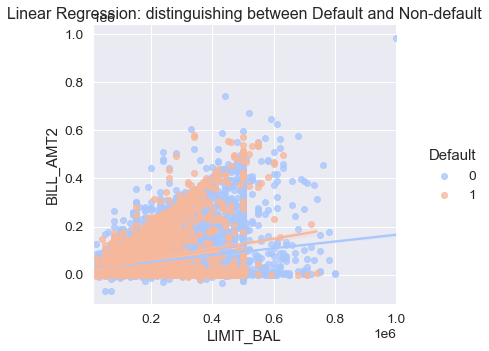

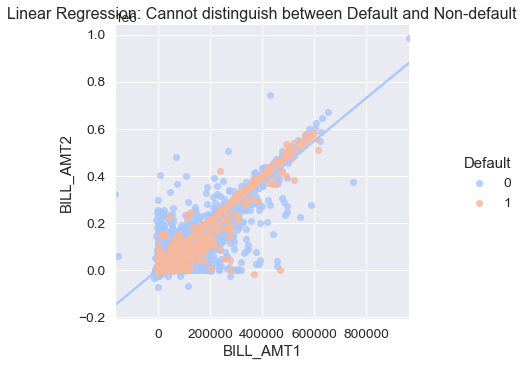

In [39]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = df, hue ='Default', 
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = df, hue ='Default', 
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);


### Data Cleaning:

We need to clean more data for better observation !

we have previously extracted outlier observations at the level of features AGE and LIMIT BAL and we mentioned that there are observations whose pay_amt and bill_amt are 0.

we will test if these last observations belong to the outliers

In [40]:
xx=df[(df['BILL_AMT1']==0) & (df['BILL_AMT2']==0) & (df['BILL_AMT3']==0) & (df['BILL_AMT4']==0) 
     & (df['BILL_AMT5']==0) & (df['BILL_AMT6']==0)   & (df['PAY_AMT1']==0) & (df['PAY_AMT2']==0) 
     & (df['PAY_AMT3']==0) & (df['PAY_AMT4']==0) & (df['PAY_AMT5']==0) & (df['PAY_AMT6']==0)]
xx['Default'].value_counts()

0    496
1    299
Name: Default, dtype: int64

We detect 795 observations of which all the characteristics BILL_AMTX and PAY_AMTX are 0 it is worth saying that these customers did not pay anything which seems illogical.

In [41]:
xx

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
18,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19,180000,2,1,2,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
45,210000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
79,240000,2,2,2,44,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
121,450000,1,1,1,40,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29908,140000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29909,360000,1,1,2,32,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29973,230000,1,2,1,35,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29979,180000,1,1,1,32,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# xx is the dataset that has 0 in columns pay_amt and bill_amt 
outliers = xx[(xx['AGE']>=60) |(xx['LIMIT_BAL']>=600000) ]
outliers

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1991,360000,1,1,2,65,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
3257,360000,1,2,1,65,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
3689,710000,1,2,1,51,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
4036,150000,2,3,1,60,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
5816,200000,1,1,1,67,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
6106,150000,1,3,1,62,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6530,230000,1,3,1,61,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
6561,280000,1,1,1,63,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7177,500000,1,2,1,61,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
7179,160000,1,2,1,62,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


We will delete these outliers!

In [43]:
df = df.drop(outliers.index.values, axis=0)
x = xx.drop(outliers.index.values, axis=0)

In [44]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,29975.00,29975.00,29975.00,29975.00,29975.00,29975.00,29975.00,29975.00,29975.00,29975.00,...,29975.00,29975.00,29975.00,29975.00,3.00e+04,29975.00,29975.00,29975.00,29975.00,29975.00
mean,167420.51,1.60,1.84,1.56,35.46,-0.02,-0.13,-0.16,-0.22,-0.26,...,43299.03,40345.02,38904.18,5668.30,5.93e+03,5230.04,4830.10,4803.39,5219.85,0.22
std,129703.27,0.49,0.74,0.52,9.19,1.12,1.20,1.20,1.17,1.13,...,64347.54,60811.35,59568.35,16569.38,2.30e+04,17613.66,15672.07,15284.05,17784.24,0.41
min,10000.00,1.00,1.00,1.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2350.00,1780.00,1261.00,1000.00,8.40e+02,390.00,300.00,259.00,129.50,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19075.00,18125.00,17111.00,2100.00,2.01e+03,1801.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54581.50,50239.50,49246.00,5007.00,5.00e+03,4512.00,4015.00,4040.00,4000.00,0.00
max,1000000.00,2.00,4.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


In [45]:
Paid_duly=df[(df['PAY_0']==-1) & (df['PAY_2']==-1) & (df['PAY_3']==-1) & (df['PAY_4']==-1) 
     & (df['PAY_5']==-1) & (df['PAY_6']==-1)  & (df['Default']== 1) ]
print(Paid_duly['MARRIAGE'].value_counts())
df = df.drop(Paid_duly.index.values, axis=0)

1    156
2    128
Name: MARRIAGE, dtype: int64


we have observations in which all the columns of 'BILL_AMT' are negative, which means that the customers have overpaid their bills even though they are classified with a default payment = 1. Which seems illogical so we will delete them.

In [46]:
overpayment =df[(df['BILL_AMT1']<0) & (df['BILL_AMT2']<0) & (df['BILL_AMT3']<0) & (df['BILL_AMT4']<0) 
     & (df['BILL_AMT5']<0) & (df['BILL_AMT6']<0) & (df['Default']==1) ]
overpayment
overpayment['Default'].value_counts()

1    26
Name: Default, dtype: int64

In [47]:
df = df.drop(overpayment.index.values, axis=0)

with PAY_ [i] = -2 means that there is no transaction made by the customer or that we notice that with a PAY_ [i] = - 2 there are values of ['PAY_AMTi']! = 0 this which is illogical

In [48]:
no_con=df[(df['PAY_0']==-2) & (df['PAY_2']==-2)  
          &(df['PAY_3']==-2) & (df['PAY_4']==-2)   
          &(df['PAY_5']==-2) & (df['PAY_6']==-2)
          ]
no_con1 =  no_con[(df['PAY_AMT1']!=0) |(df['PAY_AMT2']!=0)|(df['PAY_AMT3']!=0)|(df['PAY_AMT4']!=0)
                  |(df['PAY_AMT5']!=0) |(df['PAY_AMT6']!=0)]

no_con1

<ipython-input-48-3038b7d171b4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_con1 =  no_con[(df['PAY_AMT1']!=0) |(df['PAY_AMT2']!=0)|(df['PAY_AMT3']!=0)|(df['PAY_AMT4']!=0)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
23,450000,2,1,1,40,-2,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
33,500000,2,2,1,54,-2,-2,-2,-2,-2,...,7521,71439,8981,4152,22827,7521,71439,981,51582,0
34,500000,1,1,1,58,-2,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
52,310000,2,2,1,49,-2,-2,-2,-2,-2,...,11185,3544,464,7875,7600,11185,3544,464,0,0
55,500000,2,1,1,45,-2,-2,-2,-2,-2,...,0,151,2530,3640,162,0,151,2530,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29877,340000,1,2,2,36,-2,-2,-2,-2,-2,...,12062,3894,7957,14594,15047,12064,3894,7957,18191,0
29910,310000,1,2,2,30,-2,-2,-2,-2,-2,...,0,0,291,0,1003,0,0,291,173,0
29937,320000,1,1,1,44,-2,-2,-2,-2,-2,...,2975,2029,888,6818,13482,2975,2029,888,1332,0
29961,260000,1,1,2,33,-2,-2,-2,-2,-2,...,1368,101,955,263,0,1368,101,955,0,0


We will delete these rows

In [49]:
df = df.drop(no_con1.index.values, axis=0)

In [50]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,27955.00,27955.00,27955.00,27955.00,27955.00,27955.00,2.80e+04,27955.00,27955.00,27955.00,...,27955.00,27955.00,27955.00,27955.00,2.80e+04,27955.00,27955.00,27955.00,27955.00,27955.00
mean,161691.28,1.60,1.86,1.56,35.33,0.11,-7.55e-03,-0.04,-0.10,-0.15,...,45967.11,42847.53,41332.06,5658.87,5.94e+03,5196.46,4796.94,4762.15,5118.98,0.22
std,127927.50,0.49,0.74,0.52,9.21,1.04,1.14e+00,1.14,1.12,1.08,...,65604.12,62078.75,60785.34,16587.74,2.35e+04,17681.61,15780.61,15237.95,17593.32,0.41
min,10000.00,1.00,1.00,1.00,21.00,-2.00,-2.00e+00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-209051.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,0.00,-1.00e+00,-1.00,-1.00,-1.00,...,3488.50,2644.00,1893.50,1010.00,1.00e+03,480.00,314.50,300.00,168.00,0.00
50%,130000.00,2.00,2.00,2.00,34.00,0.00,0.00e+00,0.00,0.00,0.00,...,20623.00,19496.00,18967.00,2161.00,2.03e+03,1886.00,1500.00,1548.00,1500.00,0.00
75%,230000.00,2.00,2.00,2.00,41.00,0.00,0.00e+00,0.00,0.00,0.00,...,59022.50,54230.00,51840.50,5006.00,5.00e+03,4501.00,4010.50,4018.00,4000.00,0.00
max,1000000.00,2.00,4.00,3.00,79.00,8.00,8.00e+00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


**grouping the values of PAY_X which are >3**

Previously, we noticed from a histogram that from the value 4 the PAY_X values become negligible. so we decided to group them together with those having the value of 3.

In [51]:
#a function to easily manipulate the columns
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(0,7)]

PAY_AMT = getColumnsNames('PAY_AMT')
PAY_X = getColumnsNames('PAY_')
BILL_AMT = getColumnsNames('BILL_AMT') 

In [52]:
PAY_X.remove('PAY_1')
PAY_X

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [53]:
for i in range(len(PAY_X)):
    data  =(df[PAY_X[i]] > 3)
    df.loc[data, PAY_X[i]] = 3

In [54]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,27955.00,27955.00,27955.00,27955.00,27955.00,27955.0,27955.00,27955.00,27955.00,27955.00,...,27955.00,27955.00,27955.00,27955.00,2.80e+04,27955.00,27955.00,27955.00,27955.00,27955.00
mean,161691.28,1.60,1.86,1.56,35.33,0.1,-0.02,-0.05,-0.11,-0.16,...,45967.11,42847.53,41332.06,5658.87,5.94e+03,5196.46,4796.94,4762.15,5118.98,0.22
std,127927.50,0.49,0.74,0.52,9.21,1.0,1.10,1.10,1.06,1.02,...,65604.12,62078.75,60785.34,16587.74,2.35e+04,17681.61,15780.61,15237.95,17593.32,0.41
min,10000.00,1.00,1.00,1.00,21.00,-2.0,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-209051.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,0.0,-1.00,-1.00,-1.00,-1.00,...,3488.50,2644.00,1893.50,1010.00,1.00e+03,480.00,314.50,300.00,168.00,0.00
50%,130000.00,2.00,2.00,2.00,34.00,0.0,0.00,0.00,0.00,0.00,...,20623.00,19496.00,18967.00,2161.00,2.03e+03,1886.00,1500.00,1548.00,1500.00,0.00
75%,230000.00,2.00,2.00,2.00,41.00,0.0,0.00,0.00,0.00,0.00,...,59022.50,54230.00,51840.50,5006.00,5.00e+03,4501.00,4010.50,4018.00,4000.00,0.00
max,1000000.00,2.00,4.00,3.00,79.00,3.0,3.00,3.00,3.00,3.00,...,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


As you can see, the BILL_AMTX columns are highly correlated with each other.

### Features Scaling

Since our dataset contains a large offset between the values of the observations (especially in the features of LIMIT_BALANCE) we opted for a scaling solution to standardize the values and obtain a good visualization. But we know that this step depends on the algorithm we are going to work with, so we will leave it for the modeling part.

In [55]:
scaler = StandardScaler()
scaler.fit_transform(df['LIMIT_BAL'].values.reshape(-1, 1))

array([[-0.32590354],
       [-0.56041557],
       [-0.87309828],
       ...,
       [-1.02943963],
       [-0.63858625],
       [-0.87309828]])

In [56]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,3,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## <font color='blue'> VI. Predictive modeling:</font>

#### Machine Learning: Classification models

The algorithms that we will apply in our work are:

- K-nearest neighbor
- Support vector machine
- Logistic regression
- Classification trees
- Discriminant analysis
- Naive bayesian
- Neural network

To build machine learning models the original data was divided into features (X) and target (y) and then split into train (70%) and test (30%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

#### Spliting the data into train and test sets

In [57]:
l = df['Default']
f= df.iloc[: , :-1]
print('shape de features '+ str(f.shape))
print('shape du label '+ str(l.shape))
from sklearn.model_selection import train_test_split
f_train , f_test, l_train, l_test = train_test_split(f, l, test_size=0.3, random_state=5)
print('shape de f_train ' + str(f_train.shape))
print('shape de f_test ' + str(f_test.shape))

shape de features (27955, 23)
shape du label (27955,)
shape de f_train (19568, 23)
shape de f_test (8387, 23)


### K-nearest neighbor:

This distance-based algorithm is affected by the scale of the variables. For that we will apply the scaling with MinMaxscaler

In [58]:
#scaling
f_std = (f - f.min(axis=0)) / (f.max(axis=0) - f.min(axis=0))
scaler = MinMaxScaler()

f_train = scaler.fit_transform(f_train)
f_test = scaler.fit_transform(f_test)

Text(0, 0.5, 'Test')

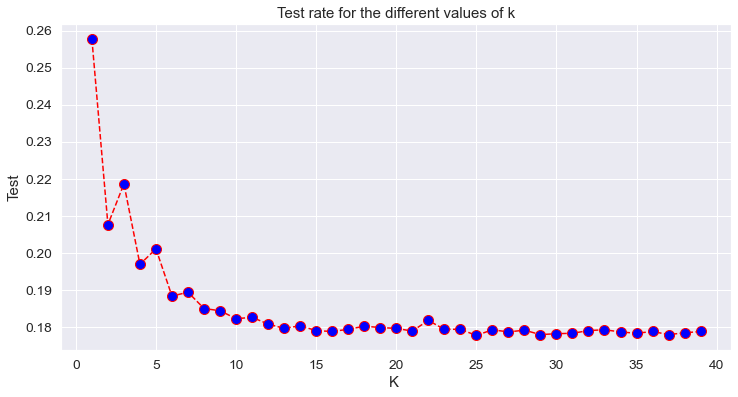

In [59]:
error = []
#For each iteration, the average error for the predicted values
# of the test set is calculated and saved in the Error list.
# Test k from 1 to 40 and the Manhattan distance
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(f_train, l_train)
    pred_i = knn_model.predict(f_test)
    val.append(np.mean(pred_i != l_test))
    # Append: add an object to the end of the list
   # mean: returns= moyenne
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Test rate for the different values of k')
plt.xlabel('K ')
plt.ylabel('Test')

We will check for which K (number of neighbors), the model generates more precision. In this case we will take k = 25, the value for which the error is minimal.

In [60]:
knn = KNeighborsClassifier(25)
knn_model = knn.fit(f_train, l_train)
y_pred_knn = knn_model.predict(f_test)

We apply the model. Then we will evaluate the performance of the model on the Test data with the performance indicators: Confusion matrix, Good Classification (Accuracy) and F1 Score

In [61]:
knn.score(f_test, l_test)

0.744843209729343

In [62]:
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(f_test, l_test)))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(f_train, l_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(f_test, l_test)))

Accuracy of K-NN classifier on test set: 0.74
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.74


Text(0.5, 257.44, 'Predicted label')

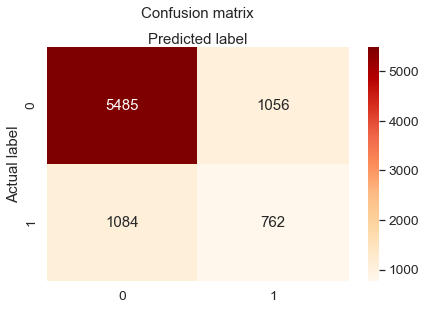

In [63]:
conf=confusion_matrix(l_test, y_pred_knn)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="OrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The value of True positive is the majority which means that our prediction is correct.

In [64]:
print(classification_report(l_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      6541
           1       0.42      0.41      0.42      1846

    accuracy                           0.74      8387
   macro avg       0.63      0.63      0.63      8387
weighted avg       0.74      0.74      0.74      8387



Accuracy = 0.82, cela signifie que notre modèle est précis à 82%

### SVM: 

In [65]:
l = df['Default']
f= df.iloc[: , :-1]
robust_scaler=RobustScaler()
X1=robust_scaler.fit_transform(f)
Y1=l
modele_SVM=SVC(kernel='rbf') #Initialising the model


In [66]:
#Y=df['Default']
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 5)
modele_SVM.fit(X1,Y1)

SVC()

In [67]:
print("the performance of our model is",modele_SVM.score(X_test,Y_test)*100," %")
print(  round(modele_SVM.score(X_train, Y_train),4) )
print(  round(modele_SVM.score(X_test, Y_test)  ,4) )

the performance of our model is 82.58018361750328  %
0.8247
0.8258


Accuracy = 0.8258, this means that our model is accurate to 82.58%

Text(0.5, 257.44, 'Predicted label')

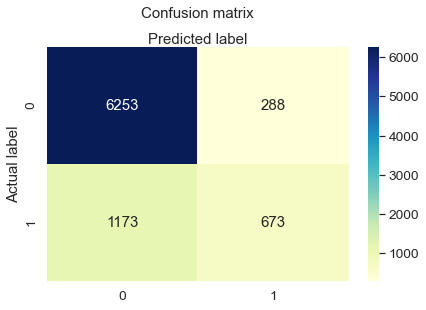

In [68]:
ysvm_pred = modele_SVM.predict(X_test)
conf=confusion_matrix(Y_test,ysvm_pred)
ysvm_pred=modele_SVM.predict(X_test)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The value of True positive is the majority which means that our prediction is correct.

In [69]:
print(classification_report(Y_test,ysvm_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6541
           1       0.70      0.36      0.48      1846

    accuracy                           0.83      8387
   macro avg       0.77      0.66      0.69      8387
weighted avg       0.81      0.83      0.80      8387



### Logistic Regression: 

In [70]:
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(f_train, l_train)                      
logreg_pred = best_model.best_estimator_.predict(f_test)    

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(f_test, l_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 1.0}
Best Accuracy : 0.815547871706212


Accuracy = 0.8155, this means that our model is accurate to 81.55%

Text(0.5, 257.44, 'Predicted label')

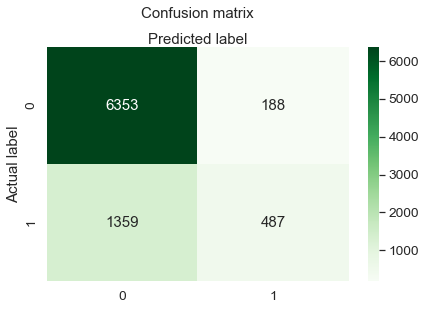

In [71]:
conf=confusion_matrix(l_test,logreg_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Decision Tree: 

In [72]:
l = df['Default']
f= df.iloc[: , :-1]
dt = DecisionTreeClassifier(random_state=0)
X_train,X_test,Y_train,Y_test = train_test_split(f,l,test_size = 0.3,random_state = 5)
dt.fit(X_train, Y_train)   
print('Le train score est :', dt.score(X_train, Y_train))
print('Le test score est :', dt.score(X_test, Y_test))
ydt_pred = dt.predict(X_test)

Le train score est : 0.9994889615699101
Le test score est : 0.7362584952903303


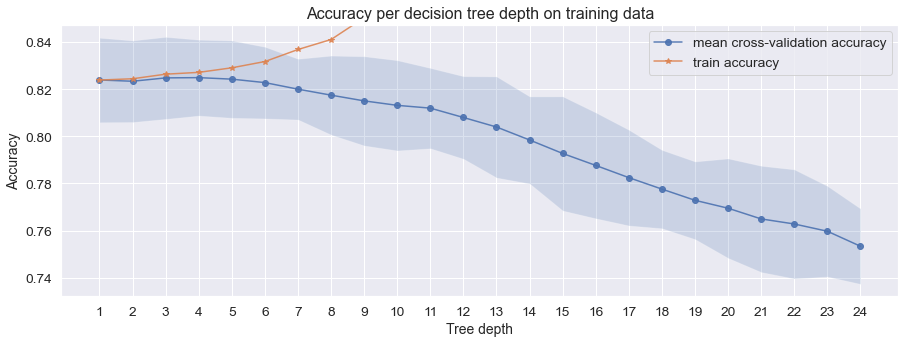

In [73]:
from pprint import pprint
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X=f, y=l, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train,  Y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [74]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-4 tree achieves the best mean cross-validation accuracy 82.49329 +/- 0.80557% on training dataset


Text(0.5, 257.44, 'Predicted label')

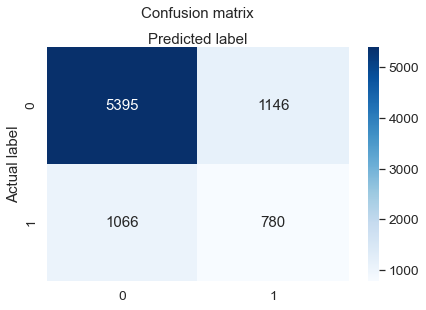

In [77]:
conf=confusion_matrix(  Y_test,ydt_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

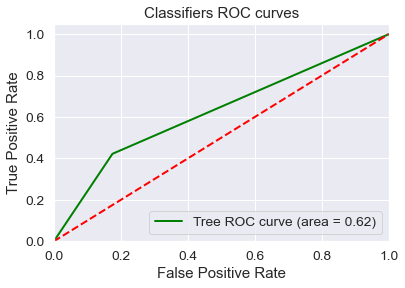

In [80]:
fpr2, tpr2, threshold2 = roc_curve(Y_test, ydt_pred)
roc_auc2 = auc(fpr2, tpr2)
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='Tree ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [81]:
dt.feature_importances_

array([0.05917652, 0.01125555, 0.02299156, 0.01316072, 0.0717167 ,
       0.17428369, 0.03842067, 0.01272997, 0.00866239, 0.00951175,
       0.01089665, 0.06373381, 0.04929732, 0.04774402, 0.03739859,
       0.04093998, 0.04394507, 0.05032778, 0.04544928, 0.05068403,
       0.04871231, 0.04511893, 0.04384273])

In [82]:
feature_names= list(df.columns[:-1])

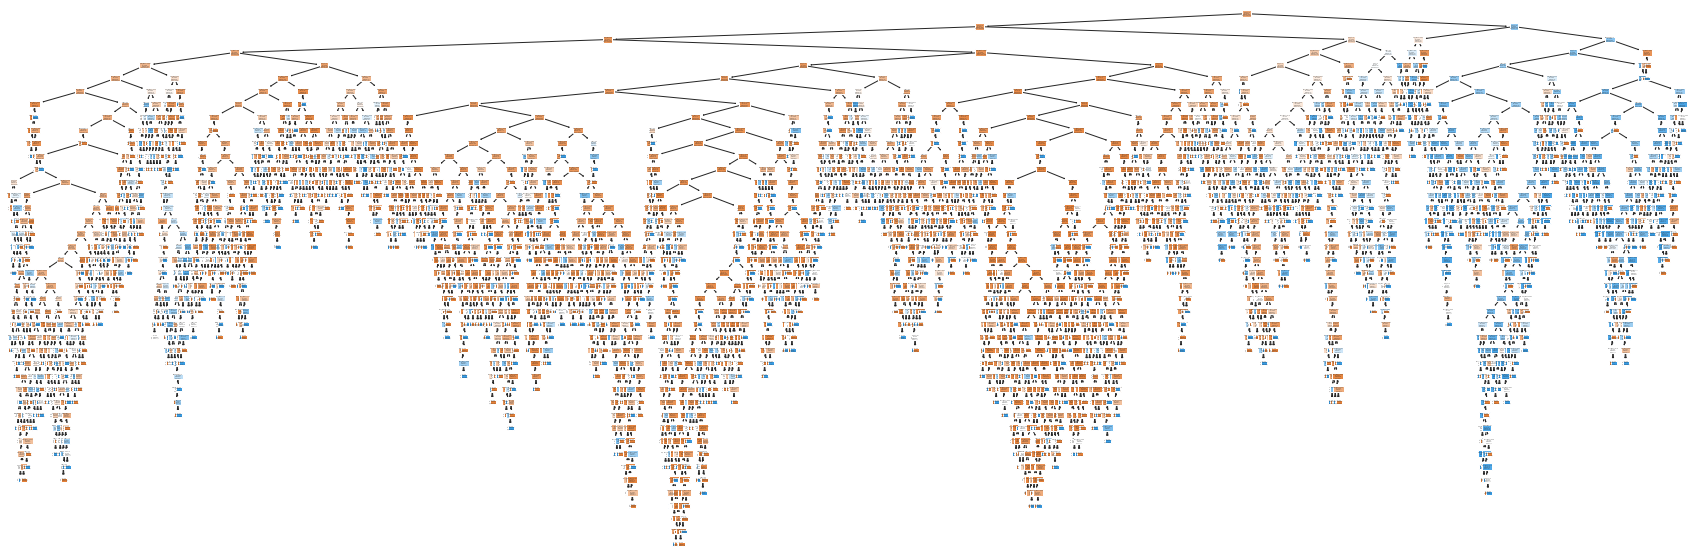

In [83]:
l = df['Default']
l
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))

plot_tree(dt, feature_names= list(df.columns[:-1]),filled=True)
plt.show()

In [84]:
print(export_text(dt, feature_names=list(df.columns[:-1])))

|--- PAY_0 <= 1.50
|   |--- PAY_2 <= 1.50
|   |   |--- PAY_AMT3 <= 0.50
|   |   |   |--- BILL_AMT1 <= 534.00
|   |   |   |   |--- LIMIT_BAL <= 305000.00
|   |   |   |   |   |--- BILL_AMT4 <= 393.00
|   |   |   |   |   |   |--- BILL_AMT1 <= -9.50
|   |   |   |   |   |   |   |--- BILL_AMT6 <= 64362.50
|   |   |   |   |   |   |   |   |--- PAY_AMT2 <= 919.50
|   |   |   |   |   |   |   |   |   |--- BILL_AMT4 <= -1745.00
|   |   |   |   |   |   |   |   |   |   |--- BILL_AMT3 <= -1975.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- BILL_AMT3 >  -1975.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- BILL_AMT4 >  -1745.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- PAY_AMT2 >  919.50
|   |   |   |   |   |   |   |   |   |--- PAY_AMT2 <= 1038.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- P

In [85]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

In [86]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [87]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [88]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [89]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=3)

In [90]:
final_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [91]:
print( 'le train_score=',final_model.score(X_train, Y_train))
print( 'le test_score=',final_model.score(X_test, Y_test))

le train_score= 0.8264002452984465
le test_score= 0.8261595326099916


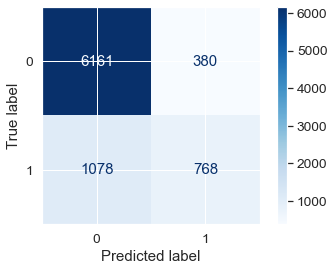

In [92]:
plot_confusion_matrix(final_model, X_test, Y_test, display_labels=[0,1], cmap=plt.cm.Blues)
plt.show()

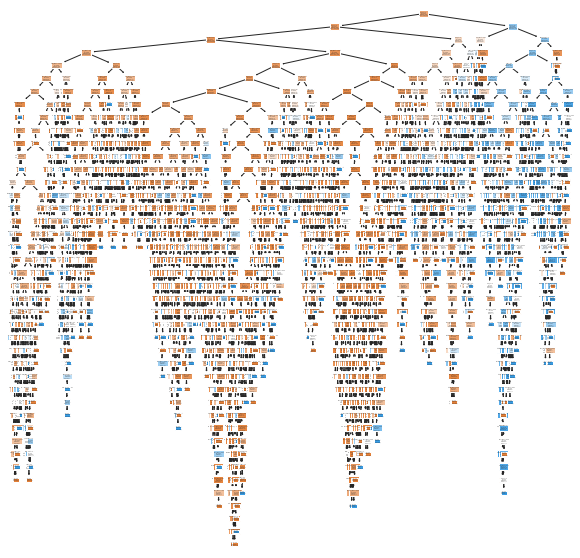

In [93]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt, feature_names= list(df.columns[:-1]),filled=True)

plt.show()

In [94]:
final_model.feature_importances_

array([0.        , 0.        , 0.007039  , 0.        , 0.        ,
       0.76634678, 0.15112501, 0.01100687, 0.        , 0.01091127,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04828754,
       0.00528352, 0.        , 0.        ])

### Naive Bayes:

In [81]:
l = df['Default']
f= df.iloc[: , :-1]

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(f,l,test_size = 0.3,random_state = 5)
#Create a Gaussian Classifier

In [83]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

ynv_pred = gnb.predict(X_test)

In [84]:
print("Accuracy:",metrics.accuracy_score(Y_test, ynv_pred))

Accuracy: 0.7541433170382735


[[5114 1427]
 [ 635 1211]]


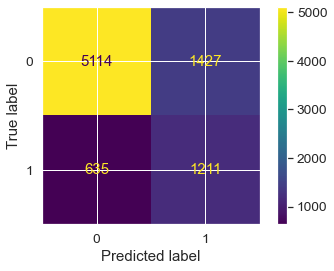

In [85]:
print(confusion_matrix(Y_test, ynv_pred))
plot_confusion_matrix(gnb, X_test, Y_test)
plt.show()

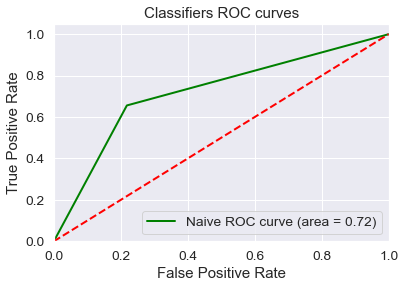

In [86]:
fpr2, tpr2, threshold2 = roc_curve(Y_test, ynv_pred)
roc_auc2 = auc(fpr2, tpr2)
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='Naive ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

The value of True positive is majority means that you have predicted positive and it is true.

### ANN: 

In [87]:
l = df['Default']
f= df.iloc[: , :-1]
f_train , f_test, l_train, l_test = train_test_split(f, l,test_size=0.3,random_state=5)
sc = StandardScaler()
f_train = sc.fit_transform(f_train)
f_test = sc.transform(f_test)

hl   = 5                    # number of hidden layer
nohl = [50,40,30,20,10]     # number of neurons in each hidden layer

classifier = Sequential()

# Hidden Layer
for i in range(hl):
    if i==0:
        classifier.add(Dense(units=nohl[i], input_dim=f_train.shape[1], kernel_initializer='uniform', activation='relu'))
    else :
        classifier.add(Dense(units=nohl[i], kernel_initializer=glorot_uniform(seed=0), activation='relu'))
# Output Layer
classifier.add(Dense(units=1, kernel_initializer=glorot_uniform(seed=0), activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
classifier.fit(f_train, l_train, epochs=100, batch_size=512)

Epoch 1/100
39/39 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7428
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.8015
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8193
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8217
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8236
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.8252
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8253
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8250
Epoch 9/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8257
Epoch 10/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8264
Epoch 11/

In [89]:
yann_pred = classifier.predict(f_test)
yann_pred = (yann_pred > 0.5)
conf_matr = confusion_matrix(l_test, yann_pred)

TP = conf_matr[0,0]; FP = conf_matr[0,1]; TN = conf_matr[1,1]; FN = conf_matr[1,0]
print('Confusion Matrix : ')
print(conf_matr)
print()
print('True Positive (TP)  : ',TP)
print('False Positive (FP) : ',FP)
print('True Negative (TN)  : ',TN)
print('False Negative (FN) : ',FN)

Confusion Matrix : 
[[5988  553]
 [1089  757]]

True Positive (TP)  :  5988
False Positive (FP) :  553
True Negative (TN)  :  757
False Negative (FN) :  1089


In [90]:
print("Accuracy:",metrics.accuracy_score(l_test, yann_pred))

Accuracy: 0.8042208179325147


Text(0.5, 10.5, 'Predicted label')

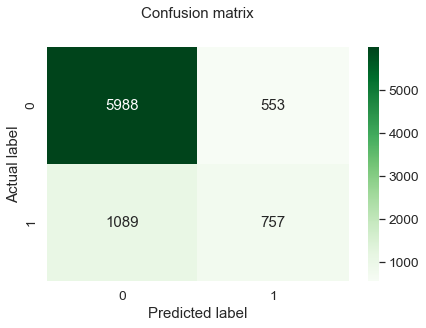

In [91]:
sns.heatmap(pd.DataFrame(conf_matr), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ADABOOST: 

In [92]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 5)
abcals = AdaBoostClassifier(n_estimators=100,random_state=100)

In [93]:
abcals = abcals.fit(X_train, Y_train)

In [94]:
yada_predict = abcals.predict(X_test)

In [95]:
print("Accuracy:",metrics.accuracy_score(Y_test, yada_predict))

Accuracy: 0.8206748539406223


Text(0.5, 257.44, 'Predicted label')

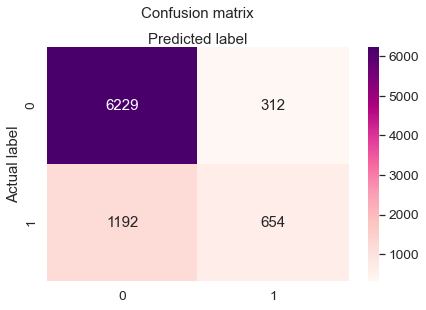

In [96]:
conf=confusion_matrix(Y_test, yada_predict)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

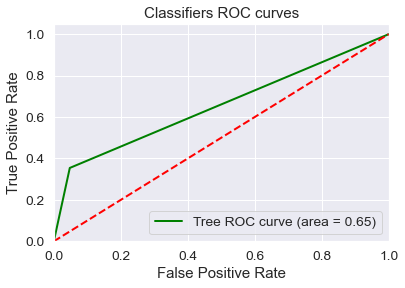

In [97]:
fpr2, tpr2, threshold2 = roc_curve(Y_test, yada_predict)
roc_auc2 = auc(fpr2, tpr2)
plt.figure() 

plt.plot(fpr2, tpr2, color='green', lw=2, label='Tree ROC curve (area = %0.2f)'% roc_auc2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

### Discriminant Analysis: 

In [98]:
l = df['Default']
f= df.iloc[: , :-1]
print('shape of features '+ str(f.shape))
print('shape of label '+ str(l.shape))
from sklearn.model_selection import train_test_split
f_train , f_test, l_train, l_test = train_test_split(f, l, test_size=0.3, random_state=5)
print('shape of f_train ' + str(f_train.shape))
print('shape of f_test ' + str(f_test.shape))

shape of features (27955, 23)
shape of label (27955,)
shape of f_train (19568, 23)
shape of f_test (8387, 23)


In [99]:
sc = StandardScaler()
f_train = sc.fit_transform(f_train)
f_test = sc.transform(f_test)
lda = LDA()
f_train = lda.fit_transform(f_train, l_train)
f_test = lda.transform(f_test)

In [100]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lda,f_test, l_test,  scoring='accuracy', cv=cv, n_jobs=-1)
ydisc=np.mean(scores)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.821 (0.009)


### Random Forest: 

In [101]:
l = df['Default']
f= df.iloc[: , :-1]
f_train , f_test, l_train, l_test = train_test_split(f, l, test_size=0.3, random_state=5)
f_std = (f - f.min(axis=0)) / (f.max(axis=0) - f.min(axis=0))
scaler = MinMaxScaler()

f_train = scaler.fit_transform(f_train)
f_test = scaler.fit_transform(f_test)
rf = RandomForestClassifier(n_estimators=80)
rf.fit(f_train, l_train)             
rf_pred = rf.predict(f_test)         

print("Accuracy: {0}".format(metrics.accuracy_score(l_test, rf_pred)))


Accuracy: 0.795278407058543


In [102]:
estimators = [10,50,80,100,150,200,250,300]

rf = RandomForestClassifier()
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(f_train, l_train)                       
rf_pred_mms = best_model.best_estimator_.predict(f_train)     

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(f_test, l_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 250}
Best Accuracy : 0.8130439966615


Text(0.5, 257.44, 'Predicted label')

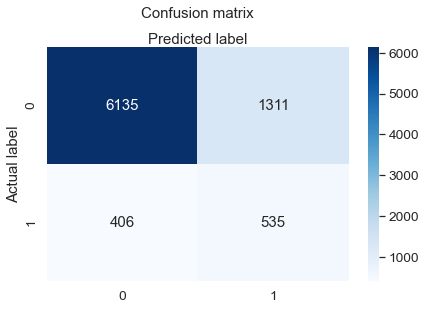

In [103]:
conf=confusion_matrix( rf_pred, l_test)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Light GBM:

Accuracy: 0.8219864075354716


Text(0.5, 257.44, 'Predicted label')

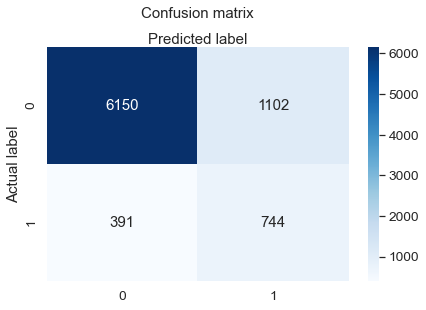

In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size = 0.3,random_state = 5)
lg = LGBMClassifier(n_estimators=200,random_state=50)
lg = lg.fit(X_train, Y_train)
ylg_predict = lg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, ylg_predict))
conf=confusion_matrix( ylg_predict, Y_test)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## <font color='blue'> V. Evaluation:</font>

We notice that with every change we make on the dataset by reducing its shape and grouping a lot of variables, we managed to have better results for predicting the default accuracy!

Every model has given a diffrent accuracy:

- KNN with an accuracy of **0.744**
- SVM with an accuracy of **0.82**
- Logistic Regression with an accuracy of **0.815**
- Decision Tree with an accuracy of **0.83**
- Naive Bayes with an accuracy of **0.754**
- ANN with an accuracy of **0.801**
- Adaboost with an accuracy of **0.820**
- discriminant Analysis with an accuracy of **0.821**
- Random forest with an accuracy of **0.808**
- Light GBM with an accuracy of **0.821**

To conclude, the model with the best results is **Decision Tree** compared to all of them.

## <font color='blue'> VI. Deployment:</font>

We managed to deploy our model in a page Web using Django we hope you like it! 